# 2. Random sample imputation

Here we will try to replace the NA with random value from dataset

When should we use it?

It will be usefull in Missing Completely At Random - MCAR

In [1]:
import pandas as pd

In [191]:
df = pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [145]:
df.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [203]:
def replace_nan(df,variable):
    df["New_"+variable] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=1)
    random_sample_index = df[df[variable].isnull()].index
    df["New_"+variable][random_sample_index] = random_sample

In [204]:
# replace NAN with random values from random sample
replace_nan(df,"Age")

<ipython-input-203-216964d8f9a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["New_"+variable][random_sample_index] = random_sample


In [205]:
df.head(10)

,Survived,Age,Fare,New_Age
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
5,0,NaN,8.4583,15.0
6,0,54.0,51.8625,54.0
7,0,2.0,21.0750,2.0
8,1,27.0,11.1333,27.0
9,1,14.0,30.0708,14.0


In [206]:
df[df.New_Age.isnull()]

,Survived,Age,Fare,New_Age


In [207]:
df.New_Age.isnull().mean()

0.0

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='Density'>

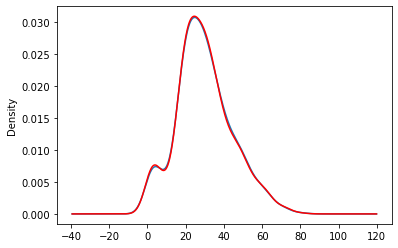

In [213]:
df["Age"].plot(kind="kde")
df["New_Age"].plot(kind="kde",color="red")

# Advantages
1. Easy to implement
2. Less distortion

# Disadvantages
1. Randomness might not work in real world

# 3. Capturing NAN with a new feature/variable

### This is useful in Systematic Missing Values

In [214]:
import numpy as np

In [215]:
df = pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [216]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0)

In [217]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [218]:
df["Age"].fillna(df.Age.median(),inplace=True)

In [220]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages
1. easy to implement
2. identify the missing values

## Disadvantages
1. adding new features/variables if NAN is present many multiple variables - curse of dimensionality

# 4. End of distribution imputation

Implemented for Systematic missing values

In [221]:
df = pd.read_csv("titanic_train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

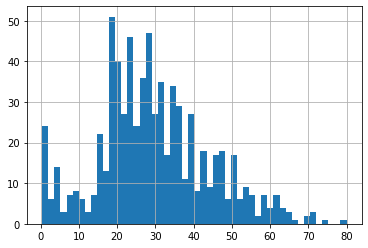

In [224]:
df.Age.hist(bins=50)

In [226]:
# Here we will take a value after 3 Std. Deviation from mean and replace the NAN
eod = df.Age.mean() + 3*df.Age.std()
eod

73.27860964406095

In [227]:
import seaborn as sns

C:\Users\bipla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

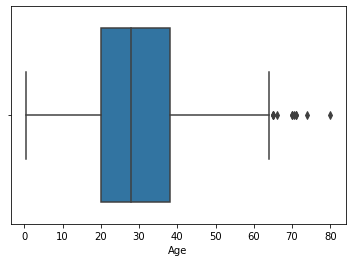

In [228]:
sns.boxplot("Age",data=df)

In [229]:
# from above we can see our outlier is on the right side so we will eod=73.27

In [234]:
def compute_nan(df,variable,eod):
    df["EOD_"+variable] = df[variable].fillna(eod)
    df[variable].fillna(df[variable].median(),inplace=True)

In [235]:
compute_nan(df,"Age",eod)

In [236]:
df.head(10)

,Survived,Age,Fare,EOD_Age
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

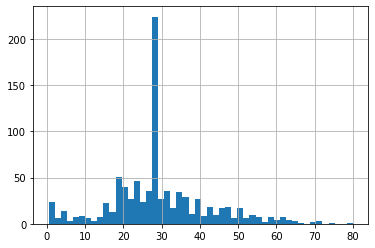

In [237]:
df.Age.hist(bins=50)

<AxesSubplot:>

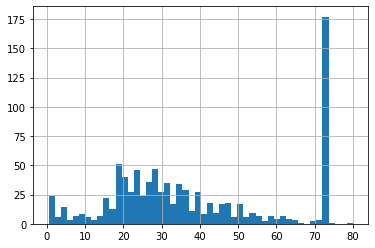

In [238]:
df.EOD_Age.hist(bins=50)

C:\Users\bipla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

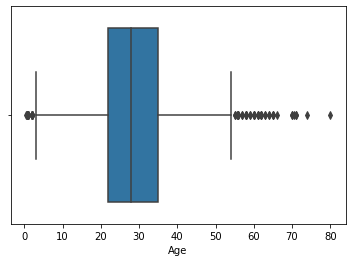

In [239]:
sns.boxplot("Age",data=df)

C:\Users\bipla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EOD_Age'>

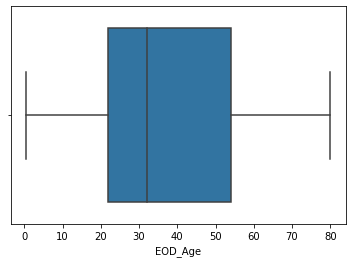

In [240]:
sns.boxplot("EOD_Age",data=df)

## Advantages
1. easy to implement
2. captures the importance of missingness

## Disadvantages
1. Distorts the original distribution
2. Masks the predictive power of original distribution
3. If NA is too big then it will intake the outliers
4. If NA is too small then it will be considered as outlier because of inclusion of EOD values